# Explatory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss



### Table of Content
1. [Loading Cleaned Vehicles Data](#Loading-Cleaned-Vehicles-Data)
2. [Inspect Data](#Inspect-Data)
4. [Cast Data Type](#Cast-Data-Type)
4. [Target vs Feature Correlation graph](#Target-vs-Feature-Correlation-graph)
5. [Feature Exraction](#Feature-Extraction)
    - [Create Target Variable](#Create-Target-Variable)
6. [Univariant Plot to Each Categorical Feature](#Univariant-Plot-to-Each-Categorical-Feature)
7. [Heatmap Correlation Matrix](#Heatmap-Correlation-Matrix)


## Loading Cleaned Vehicles Data

In [2]:
df = pd.read_csv('cleaned_vehilces data wrangling.csv')
df.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,price_kbb,mpg,rating,year_kbb
0,8995.0,2011.0,chevrolet,traverse,good,6 cylinders,gas,178054.0,clean,automatic,4wd,full-size,SUV,white,30995.0,21.0,4.3 / 5,2021.0
1,10995.0,2014.0,ford,explorer,good,6 cylinders,gas,170259.0,clean,automatic,4wd,full-size,SUV,white,33470.0,24.0,4.1 / 5,2021.0
2,12984.0,2016.0,nissan,rogue,excellent,4 cylinders,gas,86942.0,clean,automatic,4wd,mid-size,SUV,blue,26745.0,30.0,4.7 / 5,2021.0
3,17382.0,2015.0,nissan,pathfinder,excellent,6 cylinders,gas,48932.0,rebuilt,automatic,4wd,full-size,SUV,black,33075.0,23.0,4.1 / 5,2020.0
4,25730.0,2017.0,ford,explorer,excellent,6 cylinders,gas,49858.0,rebuilt,automatic,4wd,full-size,SUV,black,33470.0,24.0,4.1 / 5,2021.0


In [3]:
# Data frame dimension 
df.shape

(8730, 18)

### Inspect Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8730 entries, 0 to 8729
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         8730 non-null   float64
 1   year          8730 non-null   float64
 2   manufacturer  8730 non-null   object 
 3   model         8730 non-null   object 
 4   condition     8730 non-null   object 
 5   cylinders     8730 non-null   object 
 6   fuel          8730 non-null   object 
 7   odometer      8730 non-null   float64
 8   title_status  8730 non-null   object 
 9   transmission  8730 non-null   object 
 10  drive         8730 non-null   object 
 11  size          8730 non-null   object 
 12  type          8730 non-null   object 
 13  paint_color   8730 non-null   object 
 14  price_kbb     8730 non-null   float64
 15  mpg           8730 non-null   float64
 16  rating        8730 non-null   object 
 17  year_kbb      8730 non-null   float64
dtypes: float64(6), object(12)
me

In [5]:
missing = pd.concat([df.isnull().sum(), df.isnull().mean()], axis=1)
missing.columns = ['count', 'percentage % ']
missing.sort_values(by = ['count'], ascending = False)

,count,percentage %
price,0,0.0
year,0,0.0
rating,0,0.0
mpg,0,0.0
price_kbb,0,0.0
paint_color,0,0.0
type,0,0.0
size,0,0.0
drive,0,0.0
transmission,0,0.0


In [6]:
# Copy original features plus depreciation variable
df1 = df.copy(deep=True)

In [7]:
df1.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,price_kbb,mpg,rating,year_kbb
0,8995.0,2011.0,chevrolet,traverse,good,6 cylinders,gas,178054.0,clean,automatic,4wd,full-size,SUV,white,30995.0,21.0,4.3 / 5,2021.0
1,10995.0,2014.0,ford,explorer,good,6 cylinders,gas,170259.0,clean,automatic,4wd,full-size,SUV,white,33470.0,24.0,4.1 / 5,2021.0
2,12984.0,2016.0,nissan,rogue,excellent,4 cylinders,gas,86942.0,clean,automatic,4wd,mid-size,SUV,blue,26745.0,30.0,4.7 / 5,2021.0
3,17382.0,2015.0,nissan,pathfinder,excellent,6 cylinders,gas,48932.0,rebuilt,automatic,4wd,full-size,SUV,black,33075.0,23.0,4.1 / 5,2020.0
4,25730.0,2017.0,ford,explorer,excellent,6 cylinders,gas,49858.0,rebuilt,automatic,4wd,full-size,SUV,black,33470.0,24.0,4.1 / 5,2021.0


In [8]:
df1.shape

(8730, 18)

### Cast Data Type 

In [9]:
# cast  year, and year_kbb columns data type into int (minimize memory wastage)
df1['year'] = df1['year'].astype('int')
df1['year_kbb'] = df1['year_kbb'].astype('int')
df1.dtypes

price           float64
year              int64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
drive            object
size             object
type             object
paint_color      object
price_kbb       float64
mpg             float64
rating           object
year_kbb          int64
dtype: object

## Feature Distibution Visualization

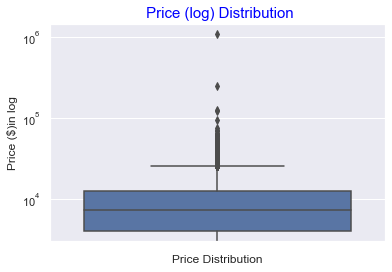

count    8.730000e+03
mean     9.502535e+03
std      1.456113e+04
min      0.000000e+00
25%      3.995000e+03
50%      7.295000e+03
75%      1.268000e+04
max      1.111111e+06
Name: price, dtype: float64

In [10]:
# box plot for the price using the log scale to compact the distribution.
sns.set()
plt.figure(figsize = (6,4))
sns.boxplot(y= df1['price'])
plt.xlabel('Price Distribution')
plt.ylabel('Price ($)in log')
plt.yscale('log')
plt.title(' Price (log) Distribution',color='blue', size = 15)
plt.show()

df1['price'].describe()

The price boxplot shows very few data points are extremely set above $ 100,000.00, These points are extreme
outliers and must remove from the price values.

In [11]:
print("The number of occurance of price equals to zero {}".format(len(df[df['price']==0])))

The number of occurance of price equals to zero 437


In [12]:
# Filter cars Price above $ 100,000 and price with less than 500 values considered as outlier
index = df1.loc[(df1['price'] > 100000) | (df1['price'] < 500 )].index
df1.drop(index, inplace=True)

In [13]:
# Applied log transformation for price to reduce variability
#df1['price'] =  np.log(df1['price'])

In [14]:
df1[['price']].describe()

,price
count,8208.000000
mean,9909.245370
std,7840.619726
min,500.000000
25%,4500.000000
50%,7900.000000
75%,12995.000000
max,95000.000000


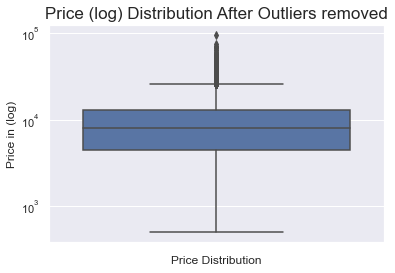

In [15]:
# The box plot for the price after outerliers removed under the log scale distribution.
sns.set()
plt.figure(figsize = (6,4))
sns.boxplot(y= df1['price'])
plt.xlabel('Price Distribution')
plt.ylabel('Price in (log)')
plt.yscale('log')
plt.title('Price (log) Distribution After Outliers removed', size = 17)
plt.show()
# visualize the graph versus statistacl summary report


The extreme outliers trimmed and max price dropped from 1.1 million to 95,000 and min price set to 1.000

In [16]:
df1.shape

(8208, 18)

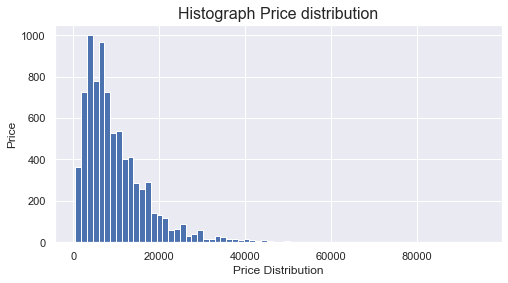

In [17]:
# Histograph for price distribution
sns.set()
plt.figure(figsize= (8,4))
df1.price.plot(kind='hist', bins=70)
plt.xlabel('Price Distribution')
plt.ylabel('Price')
plt.title('Histograph Price distribution', size=16)
plt.show()

The price distirbution is skewed to the left, and tailed to the right.

In [18]:
# Odometer distribution
df1['odometer'].describe()

count    8.208000e+03
mean     1.121416e+05
std      8.155174e+04
min      0.000000e+00
25%      6.600000e+04
50%      1.081535e+05
75%      1.500000e+05
max      2.004530e+06
Name: odometer, dtype: float64

#### Truncate Outliers

In [19]:
# 'odometer'summary statistics shows thtat min milage cover range from zero until over two-million.
#The cars odometer reading over 400000 is an outlier. 
#filter feature odometer over 400000 is rare in the market fiar to remove as outliers 
index = df1.loc[df1['odometer'] > 400000].index
df1.drop(index, inplace=True)


In [20]:
# Odometer summary
df1.odometer.describe()

count      8188.000000
mean     109626.702736
std       59239.899305
min           0.000000
25%       65863.250000
50%      108000.000000
75%      149630.250000
max      395000.000000
Name: odometer, dtype: float64

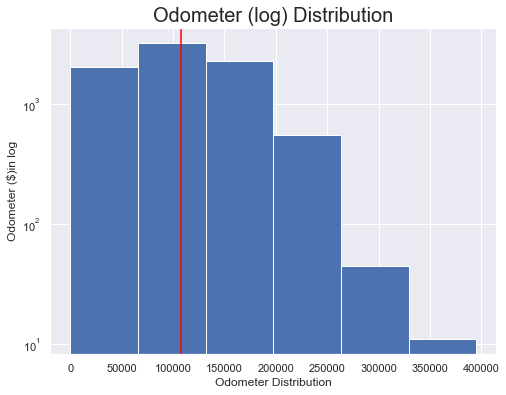

count      8188.000000
mean     109626.702736
std       59239.899305
min           0.000000
25%       65863.250000
50%      108000.000000
75%      149630.250000
max      395000.000000
Name: odometer, dtype: float64

In [21]:
# Histograph Odometer distribution shows very fews cars have odometer reading above 350,000 thus the value over 400000
# is exteremly insignifcant number which is outlier to odometer reading series.
sns.set()
plt.figure(figsize = (8,6))
df1.odometer.plot(kind='hist', bins=int(np.log(np.sqrt(400000))))
plt.xlabel('Odometer Distribution')
plt.ylabel('Odometer ($)in log')
plt.yscale('log')
plt.axvline(df1.odometer.median(), color='red')
plt.title('Odometer (log) Distribution', size = 20)
plt.show()
df1.odometer.describe()

In [22]:
# Get "year_difference" parameter from current year minus years car-made.
df1["year_difference"] = (df1['year_kbb']) - df1['year']
# year_difference statistic summary.
df1.year_difference.describe()

count    8188.000000
mean       10.270762
std         7.066011
min         0.000000
25%         6.000000
50%         9.000000
75%        14.000000
max        60.000000
Name: year_difference, dtype: float64

The dataset holds cars age range bewteen zero (new_cars) and sixty years old (antique cars).The mean and 
median year_difference is very close to each others implies there is no extreme outliers affect the mean.
Hence, the distribution is fairly skewed.

In [23]:
len(df1[df1['year_difference'] == 0])

42

### Feature Extraction

In [24]:
# Take care the domain "year-difference" should be at least zero or greater.
df1['year_difference'] = df1['year_difference'].apply(lambda x : 1 if x==0 else x)

In [25]:
#To find adjusted new price using function
def get_inflation(df1):
   #using compound interest formula
    #A = current or finall amount = df1['price_kbb']
    #P = initial amount to be predicted 
    #t= Duration = df1['year_difference']
    #n= numberof times a given duration
    #r= inflation rate or interest rate
    return df1['price_kbb']/(1.02 ** df1['year_difference'])

In [26]:
#df1['year_difference'] = np.log(df1['year_difference'])

In [27]:
#df1["price_kbb"] = df1['price_kbb'].astype('int64')
df1['price_kbb'].dtype

dtype('float64')

In [28]:
# method one using function
df1['new_price'] = round(get_inflation(df1),3)
df1['new_price'][1:5]

1    29137.649
2    24223.771
3    29957.047
4    30921.106
Name: new_price, dtype: float64

In [29]:
# Second method using apply function, function call is expesnive, using verctorized apply built in method is appropriate
df1['new_price'] = round(df1['price_kbb']/df1['year_difference'].apply(lambda x: 1.02 ** x), 3)

df1['new_price'][1:5]

1    29137.649
2    24223.771
3    29957.047
4    30921.106
Name: new_price, dtype: float64

#### Drop Bad Data from Price 

In [30]:
# Drop the used car sold price is greater than the estimated price while the car was new brand, and the year
# made is greater than 1990. Because car made before 1990 considered as antique cars which recovred thier value.
bad_data = df1[(df1['price'] > df1['new_price']) & (df1['year'] > 1985)].index
len(bad_data)

187

In [31]:
df1.drop(bad_data, axis=0, inplace=True)

In [32]:
df1.shape

(8001, 20)

### Create Target Variable

In [33]:
# Create "depreciation" variable from the used car sold price and estimated price when the car was new.
df1['depreciation'] = 1-(df1['price']/df1['new_price'])

In [34]:
# Crete "depreciation per year" feature by reversing the compounded interet rate given the principal amount. 
df1['depreciation per year'] = -1*((-df1['depreciation'] + 1)**(1/df1['year_difference'])-1)

In [35]:
df1.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,...,type,paint_color,price_kbb,mpg,rating,year_kbb,year_difference,new_price,depreciation,depreciation per year
0,8995.0,2011,chevrolet,traverse,good,6 cylinders,gas,178054.0,clean,automatic,...,SUV,white,30995.0,21.0,4.3 / 5,2021,10,25426.696,0.646238,0.098696
1,10995.0,2014,ford,explorer,good,6 cylinders,gas,170259.0,clean,automatic,...,SUV,white,33470.0,24.0,4.1 / 5,2021,7,29137.649,0.622653,0.129970
2,12984.0,2016,nissan,rogue,excellent,4 cylinders,gas,86942.0,clean,automatic,...,SUV,blue,26745.0,30.0,4.7 / 5,2021,5,24223.771,0.463998,0.117259
3,17382.0,2015,nissan,pathfinder,excellent,6 cylinders,gas,48932.0,rebuilt,automatic,...,SUV,black,33075.0,23.0,4.1 / 5,2020,5,29957.047,0.419769,0.103149
4,25730.0,2017,ford,explorer,excellent,6 cylinders,gas,49858.0,rebuilt,automatic,...,SUV,black,33470.0,24.0,4.1 / 5,2021,4,30921.106,0.167882,0.044906


In [36]:
df1.shape

(8001, 22)

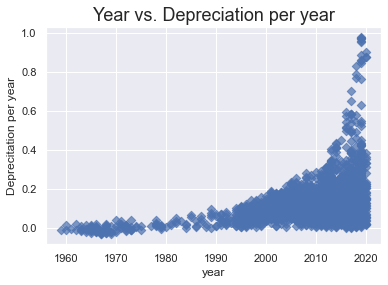

In [37]:
# Scatter plot 'depreciation per year'
plt.scatter(df1['year'], df1['depreciation per year'], marker='D', alpha=0.7)
plt.xlabel('year')
plt.ylabel('Deprecitation per year')
plt.title('Year vs. Depreciation per year', size=18)
plt.show()

Generally, the plot shows the steep slope indicating that new cars depreciate faster. 

In [38]:
df1.columns

Index(['price', 'year', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'size',
       'type', 'paint_color', 'price_kbb', 'mpg', 'rating', 'year_kbb',
       'year_difference', 'new_price', 'depreciation',
       'depreciation per year'],
      dtype='object')

In [39]:
#Overview the dataframe after the null values removed from the dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8001 entries, 0 to 8729
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   price                  8001 non-null   float64
 1   year                   8001 non-null   int64  
 2   manufacturer           8001 non-null   object 
 3   model                  8001 non-null   object 
 4   condition              8001 non-null   object 
 5   cylinders              8001 non-null   object 
 6   fuel                   8001 non-null   object 
 7   odometer               8001 non-null   float64
 8   title_status           8001 non-null   object 
 9   transmission           8001 non-null   object 
 10  drive                  8001 non-null   object 
 11  size                   8001 non-null   object 
 12  type                   8001 non-null   object 
 13  paint_color            8001 non-null   object 
 14  price_kbb              8001 non-null   float64
 15  mpg 

In [40]:
# Copy the original datafram to new variable df1 using copy()
df2 = df1.dropna().copy(deep=True)

In [41]:
df2.shape

(8001, 22)

In [42]:
df2.columns

Index(['price', 'year', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'size',
       'type', 'paint_color', 'price_kbb', 'mpg', 'rating', 'year_kbb',
       'year_difference', 'new_price', 'depreciation',
       'depreciation per year'],
      dtype='object')

In [43]:
#Remove characters from rating
df2['rating'] = df2['rating'].apply(lambda x: x.replace('/', '').replace('5',''))

In [44]:
# convert the rating string data type into  floating type using to_numeric method
df2['rating'] = pd.to_numeric(df2['rating'], errors='coerce')
df2.rating.dtype

dtype('float64')

In [45]:
# Set the depreciation per year distribution within three standard deviation.
std = df2['depreciation per year'].std()
mean = df2["depreciation per year"].mean()
error = std * 3
lower, upper = mean - error, mean + error
df2 = df2[(df2['depreciation per year']> lower)&(df2['depreciation per year'] < upper)]
df2[['depreciation per year']].describe()

,depreciation per year
count,7890.000000
mean,0.111694
std,0.048202
min,-0.034884
25%,0.083208
50%,0.107860
75%,0.135217
max,0.322016


In [46]:
df2.shape

(7890, 22)

In [47]:
bad_index = df2[df2['price'] + (df2['depreciation'] * df2['new_price'])  > df2['new_price']].index

In [48]:
df2.drop(bad_index, axis=0, inplace=True)

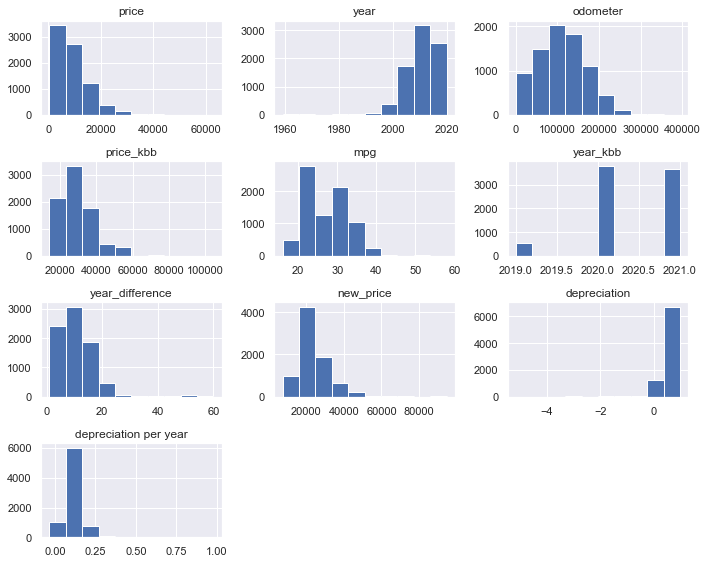

In [49]:
# Numerical features distribution
df1.hist(figsize=(10,8))
plt.tight_layout()
plt.show()

## Target vs Feature Correlation graph

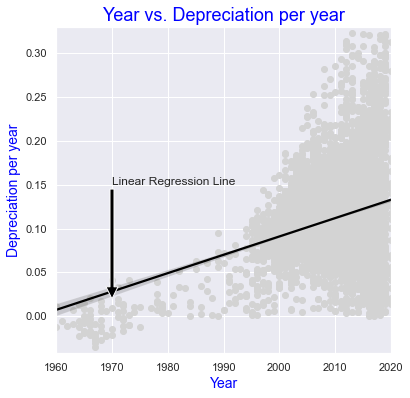

In [50]:
# Scatter plot for price and odometer distribution and their association
fig, ax = plt.subplots(figsize = (6, 6))
plt.scatter(df2['year'], df2['depreciation per year'], marker = 'o', color='lightgray')
sns.regplot(x='year', y='depreciation per year', data=df2, scatter=None, color='black',label='First Order')
#sns.regplot(x='year', y='depreciation per year', data=df2, scatter=None, color='red',label= 'Second Order', order=2)
plt.xlabel('Year', color='blue', size=14)
plt.ylabel('Depreciation per year', color='blue', size=14)
plt.annotate("Linear Regression Line", xy=(1970, 0.02), xytext=(1970, 0.15),arrowprops
            = dict(facecolor='black'))
plt.title('Year vs. Depreciation per year',color='blue', size = 18)

plt.margins(0.02)
plt.show()

In normal circumstances, depreciation values should be between zero and one, but negative values are depicted over the year between 1960 and 1970. The reason those Antique cars are sold at greater price than when new. Hence, the negative depreciation implies the values of those cars are appreciated.


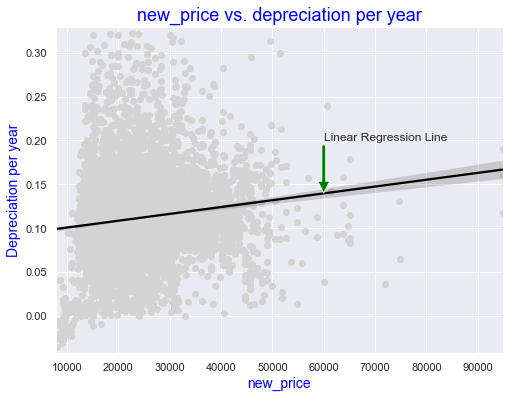

In [51]:
# Scatter plot for price and odometer distribution and their association
fig, ax = plt.subplots(figsize = (8, 6))
plt.scatter(df2['new_price'], df2['depreciation per year'], marker = 'o', color='lightgray')
sns.regplot(x='new_price', y='depreciation per year', data=df2, scatter=None, color='black',label='First Order')
plt.annotate("Linear Regression Line", xy=(60000, 0.14), xytext=(60000, 0.2),arrowprops= dict(facecolor='green'))
plt.xlabel('new_price', color='blue', size=14)
plt.ylabel('Depreciation per year', color='blue', size=14)

plt.title('new_price vs. depreciation per year',color='blue', size = 18)
plt.margins(0.02)
plt.show()

 The regression line shows the depreciation per year increases as the price of the car's values become more expensive. 



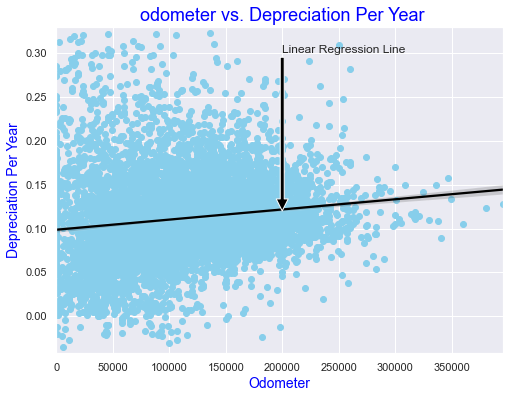

In [52]:
# Scatter plot for price and odometer distribution and their association

fig, ax = plt.subplots(figsize = (8, 6))
plt.scatter(df2['odometer'], df2['depreciation per year'], marker = 'o', color='skyblue')
sns.regplot(x='odometer', y='depreciation per year', data=df2, scatter=None, color='black',label='First Order')

plt.xlabel('Odometer', color='blue', size=14)
plt.ylabel('Depreciation Per Year', color='blue', size=14)
plt.annotate("Linear Regression Line", xy=(200000, 0.12), xytext=(200000, 0.3),arrowprops
            = dict(facecolor='black'))

plt.title(' odometer vs. Depreciation Per Year',color='blue', size = 18)
plt.margins(0.02)
plt.show()

The regression slope shows as the odometer increases the depreciation per year remains constant for the entire period of cars’ service. The datapoints distribution indicated that the depreciation faster cars when new. 



In [53]:
df2.shape

(7490, 22)

In [54]:
# The minimum value of depreciation per year
min(df2['depreciation per year'])

-0.034883758913167195

In [55]:
# The negative signs imply that Used card sold more than the bought cost cars when new, such as Antique cars.

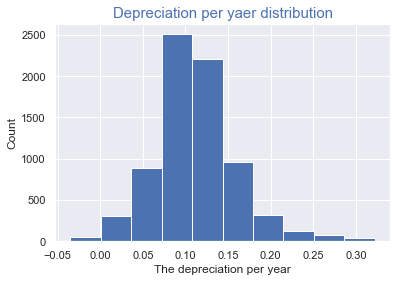

In [56]:
df2['depreciation per year'].hist()
plt.xlabel('The depreciation per year')
plt.ylabel('Count')
plt.title('Depreciation per yaer distribution', color='b',fontsize='15')
plt.show()

After the outliers removed the depreciation per year maintain normal distribution.

In [57]:
df2.columns

Index(['price', 'year', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'size',
       'type', 'paint_color', 'price_kbb', 'mpg', 'rating', 'year_kbb',
       'year_difference', 'new_price', 'depreciation',
       'depreciation per year'],
      dtype='object')

## Univariant Plot to Each Categorical Feature

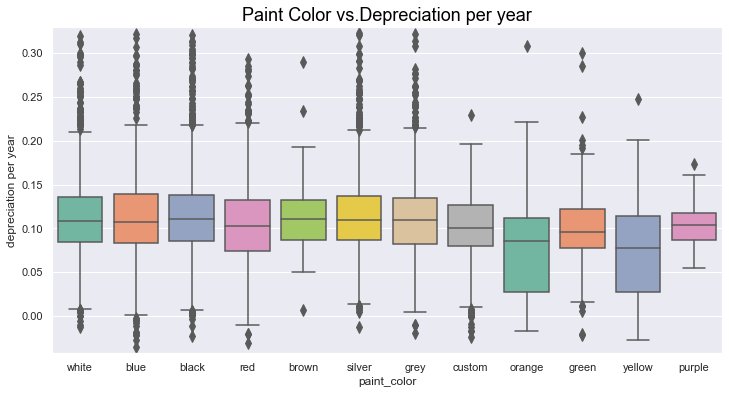

In [58]:
#Box plot distribution on car prices and paint color features 
plt.figure(figsize=(12,6))
ax = sns.boxplot(x='paint_color', y='depreciation per year', data=df2, orient="v", palette="Set2", fliersize=8, color='r')
plt.title('Paint Color vs.Depreciation per year', color='black', size = 18)
plt.margins(0.02)

In [59]:
# Generally, the depreciation medians among the color paint groups nearly similar, however, 
# a car with green and yellow paint color has the least depreciation per year.


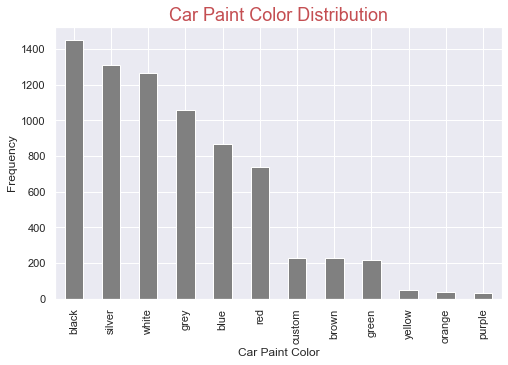

In [60]:
# The frequency distribution of cars based on its paint color
plt.figure(figsize=(8,5))
df2['paint_color'].value_counts().plot(kind='bar', color='gray')
plt.ylabel('Frequency')
plt.xlabel('Car Paint Color')
plt.title("Car Paint Color Distribution",color='r',size=18)
plt.show()

 The bar graph shows that popele are not in favor of to buy cars painted color with 
 'yellow', 'purple' and 'orange'. These colors are common in heavy machinary cars and sport car-race than the 
ordinary cars.

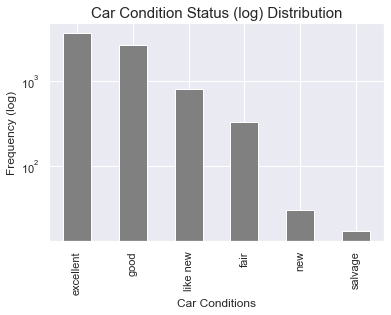

excellent    0.488652
good         0.353405
like new     0.107610
fair         0.044059
new          0.004005
salvage      0.002270
Name: condition, dtype: float64

In [61]:
# Bar plot distirbution on car condition feature
plt.figure(figsize=(6, 4))
df2.condition.value_counts().dropna().plot(kind='bar', color='gray')
_= plt.xlabel('Car Conditions')
_= plt.ylabel('Frequency (log)')
_= plt.yscale('log')
_= plt.title('Car Condition Status (log) Distribution', size = 15)
plt.show()
# Car conditon frequencey plot versus statistical proporation rate.
df2.condition.value_counts(normalize=True)

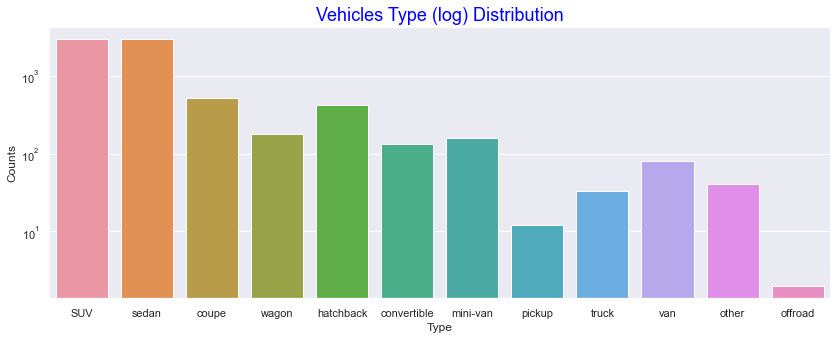

sedan          0.395995
SUV            0.395060
coupe          0.068091
hatchback      0.055808
wagon          0.023899
mini-van       0.021095
convertible    0.017623
van            0.010681
other          0.005474
truck          0.004406
pickup         0.001602
offroad        0.000267
Name: type, dtype: float64

In [62]:
#scatterplot for price and Make year distribution
fig, ax = plt.subplots(figsize = (14, 5))
#df2.type.value_counts().plot(kind = 'bar')
sns.countplot(x='type', data=df2)
plt.xlabel('Type')
plt.ylabel('Counts')
plt.yscale('log')
plt.title('Vehicles Type (log) Distribution',color='blue', size = 18)
plt.show()
df2.type.value_counts(normalize=True)

In [63]:
#The distribution illustrate Seden and SUV vehilces are diminate the market.

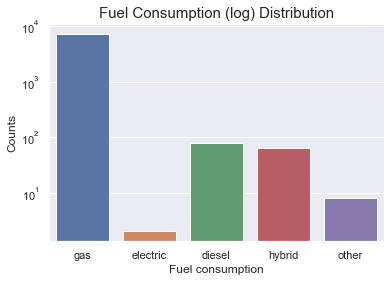

In [64]:
#scatterplot for fuel consumption distribution
fig, ax = plt.subplots(figsize = (6, 4))
#df2.fuel.value_counts().plot(kind = 'bar')
sns.countplot(x='fuel', data=df2)
plt.xlabel('Fuel consumption')
plt.ylabel('Counts')
plt.yscale('log')
plt.title('Fuel Consumption (log) Distribution', size = 15)
plt.show()


In [65]:
# Car Fuel consumption propertion
df2.fuel.value_counts(normalize=True)
# Vehicles with gas fuel consumption took 98% 

gas         0.979840
diesel      0.010280
hybrid      0.008545
other       0.001068
electric    0.000267
Name: fuel, dtype: float64

In [66]:
# Gas fuel consumption is exteremly dominated the distribution. moreover, the others types of fuel comsumption such as 
# hybrid, electric and diesel and others types of fuel is barely cover 2% of the total consumptionn. This is  clear 
# indication of introducing enviromental friendly cars is prevail at insignificant rate. 

In [67]:
#df2['drive'] = np.log(df2['drive'])

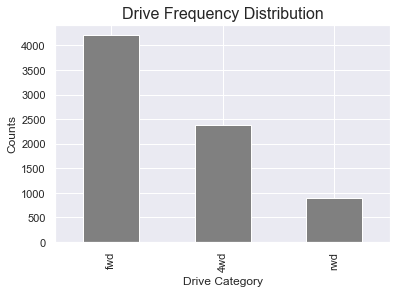

In [68]:
#scatterplot for price and car drive type distribution
fig, ax = plt.subplots(figsize = (6, 4))
df2.drive.value_counts().plot(kind = 'bar', color ='gray')
plt.xlabel('Drive Category')
plt.ylabel('Counts')
plt.title('Drive Frequency Distribution', size = 16)
plt.show()


In [69]:
#The drive type have enough sample representation 
df2.drive.value_counts(normalize=True)

fwd    0.562750
4wd    0.318692
rwd    0.118558
Name: drive, dtype: float64

In [70]:
# proppertion rate of cylindes type 
df2.cylinders.value_counts(normalize=True)

4 cylinders     0.522029
6 cylinders     0.358611
8 cylinders     0.094793
5 cylinders     0.017891
3 cylinders     0.003204
10 cylinders    0.001736
other           0.001736
Name: cylinders, dtype: float64

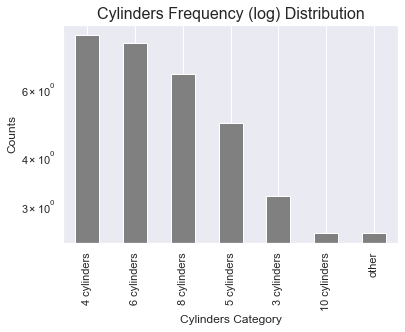

In [71]:
# From the above propertion ratio using log scale recommeded for visualization 
# as the top two-feature exteremly dominated the remaining features.
fig, ax = plt.subplots(figsize = (6, 4))
np.log(df2.cylinders.value_counts()).plot(kind = 'bar', color='gray')
plt.xlabel('Cylinders Category')
plt.ylabel('Counts')
plt.yscale('log')
plt.title('Cylinders Frequency (log) Distribution', size = 16)
plt.show()

The log distribution assist to visualize the last two-feature having exteremly less proportion.

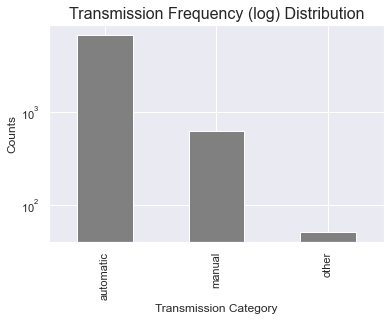

In [72]:
# Frequency distribution of car transmission
fig, ax = plt.subplots(figsize = (6, 4))
df2.transmission.value_counts().plot(kind = 'bar', color='gray')
plt.xlabel('Transmission Category')
plt.ylabel('Counts')
plt.yscale('log')
plt.title('Transmission Frequency (log) Distribution', size = 16)
plt.show()

In [73]:
# Over 90% of transmission type propertion is dominated by automatic transmission
df2.transmission.value_counts(normalize=True)

automatic    0.909880
manual       0.083311
other        0.006809
Name: transmission, dtype: float64

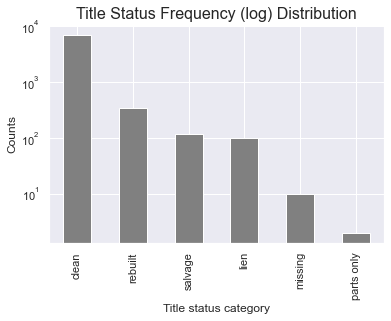

In [74]:
# Bar graph of car title status distribution
fig, ax = plt.subplots(figsize = (6, 4))
df2.title_status.value_counts().plot(kind = 'bar', color='gray')
plt.xlabel('Title status category')
plt.ylabel('Counts')
plt.yscale('log')
plt.title('Title Status Frequency (log) Distribution', size = 16)
plt.show()

In [75]:
#Title Status propertion per catagories
df2.title_status.value_counts(normalize=True)
# 94% of the cars "title-status" is clean thus, wide range distribution should scalled 
# using the log scale to visualize the status of all categories.

clean         0.923899
rebuilt       0.045661
salvage       0.015888
lien          0.012951
missing       0.001335
parts only    0.000267
Name: title_status, dtype: float64

In [76]:
#The propertion by car size, almost all the categories has enough samples 
df2['size'].value_counts(normalize=True)

full-size      0.418558
mid-size       0.367557
compact        0.189987
sub-compact    0.023899
Name: size, dtype: float64

In [77]:
# The types manufcturer in the dataset  using unique() method.
df2.manufacturer.unique()

array(['chevrolet', 'ford', 'nissan', 'subaru', 'chrysler', 'hyundai',
       'kia', 'dodge', 'honda', 'volkswagen', 'buick', 'lincoln',
       'cadillac', 'audi', 'mazda', 'acura', 'volvo', 'infiniti',
       'mitsubishi', 'bmw', 'fiat', 'jaguar', 'lexus', 'mini', 'porche'],
      dtype=object)

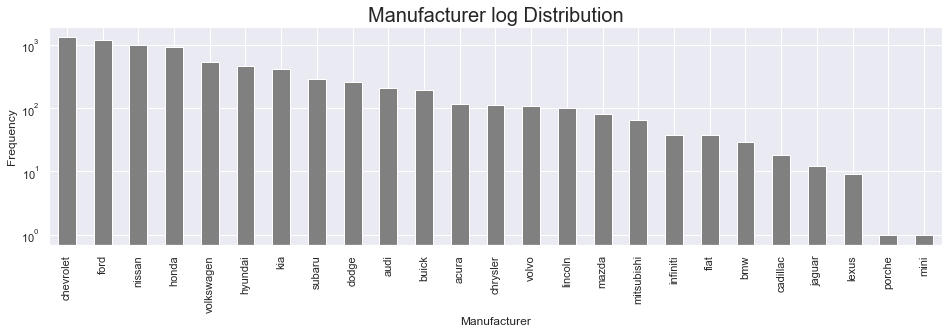

In [78]:
# Manufactuer frequencey distribution 
_= plt.figure(figsize= (16, 4))
df2.manufacturer.value_counts().dropna().plot(kind='bar', color='gray')
_= plt.xlabel('Manufacturer')
_= plt.ylabel('Frequency')
_= plt.yscale('log')
_= plt.title('Manufacturer log Distribution', size = 20)
plt.show()

Mini and Porch manufacturer has an insufficient number of cars to represent the sample relative to 
the other manufacturers to get the statistical values.


In [79]:
df2['manufacturer'].value_counts()

chevrolet     1309
ford          1196
nissan         995
honda          923
volkswagen     530
hyundai        453
kia            415
subaru         288
dodge          255
audi           205
buick          194
acura          117
chrysler       111
volvo          107
lincoln        101
mazda           82
mitsubishi      65
infiniti        37
fiat            37
bmw             29
cadillac        18
jaguar          12
lexus            9
porche           1
mini             1
Name: manufacturer, dtype: int64

In [80]:
# mini and porche manufacturers have less data for statistical analysis.

In [81]:
# Remove the mini and porche manufacturer
index = df2.loc[(df2['manufacturer']=='mini') | (df2['manufacturer']=='porche')].index
df2.drop(index, inplace=True)

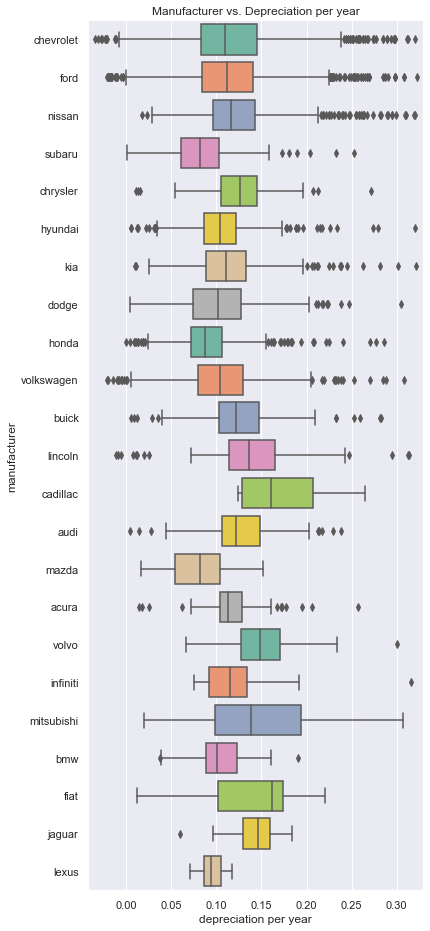

In [82]:
_= plt.figure(figsize=(6,16))
#df2.groupby('manufacturer')['depreciation per year'].median().sort_values(ascending=False).plot(kind='box')
_= sns.boxplot(x=df2['depreciation per year'], y='manufacturer',  data=df2, orient='h', palette="Set2")
_=plt.title('Manufacturer vs. Depreciation per year')
_=plt.margins(0.02)



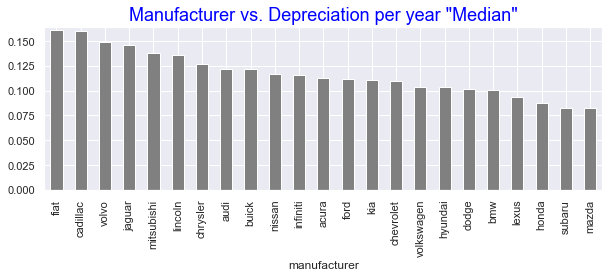

In [83]:
# Select the top five most expensive manufacturer using groupby method
plt.figure(figsize=(10, 3))
df2.groupby('manufacturer')['depreciation per year'].median(). sort_values(ascending=False).plot(kind='bar',color='gray')
plt.title('Manufacturer vs. Depreciation per year "Median"',color='blue',size=18)
plt.margins(0.02)
plt.show()

The bar graph shows Cadillac, Fiat, Volvo, Jaguar, and Lincoln manufacturers are the top five in a depreciation per year respectively, on the other hand,  Subaru retains the value better than any other cars. Next to Subaru, Mazda, Honda, Lexus, and BMW manufacturers are better in price retaining than most others.



In [84]:
df2['manufacturer'].value_counts()

chevrolet     1309
ford          1196
nissan         995
honda          923
volkswagen     530
hyundai        453
kia            415
subaru         288
dodge          255
audi           205
buick          194
acura          117
chrysler       111
volvo          107
lincoln        101
mazda           82
mitsubishi      65
infiniti        37
fiat            37
bmw             29
cadillac        18
jaguar          12
lexus            9
Name: manufacturer, dtype: int64

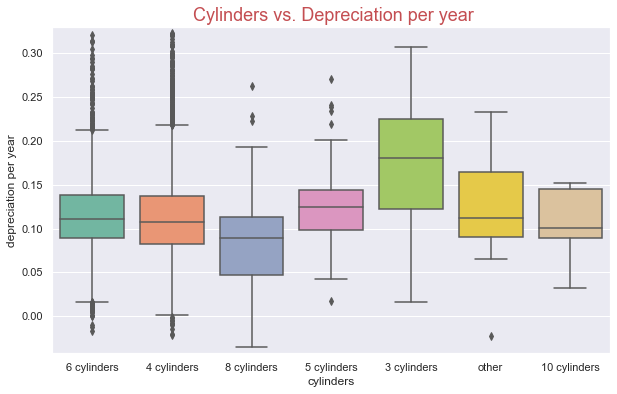

In [85]:
# Distribution of Car price versus type of Cylinders 
plt.figure(figsize=(10,6))
ax = sns.boxplot(x='cylinders', y='depreciation per year', data=df2, orient="v", palette="Set2")
plt.title(' Cylinders vs. Depreciation per year', color = 'r', size = 18)
plt.margins(0.02)


In [86]:
# Used cars with 8 cylinders generally have less depreciation per year than any others.
df2.cylinders.value_counts(normalize = True)

4 cylinders     0.522035
6 cylinders     0.358574
8 cylinders     0.094818
5 cylinders     0.017895
3 cylinders     0.003205
10 cylinders    0.001736
other           0.001736
Name: cylinders, dtype: float64

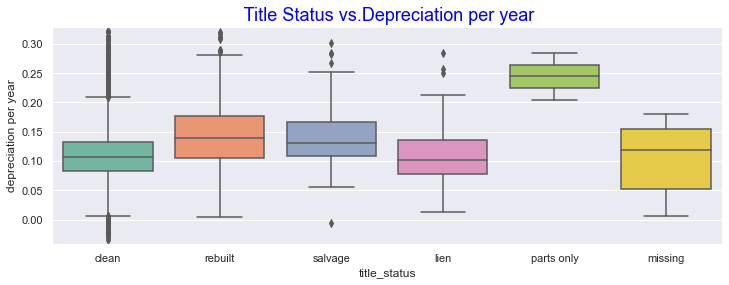

In [87]:
# Box plot distribution on title status versus car prices

plt.figure(figsize=(12,4))
ax = sns.boxplot(x='title_status', y='depreciation per year', data=df2, orient="v", palette="Set2",fliersize=5)
plt.title(' Title Status vs.Depreciation per year',color='blue', size = 18)
plt.margins(0.02)


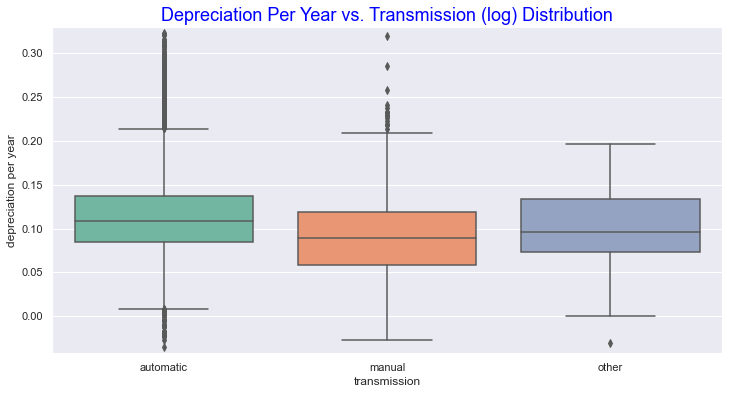

In [88]:
# The association of transmission and car price
plt.figure(figsize=(12,6))
ax = sns.boxplot(x='transmission', y='depreciation per year', data=df2, orient="v", palette="Set2")
plt.title('Depreciation Per Year vs. Transmission (log) Distribution',color='blue', size = 18)
# plt.yscale('log')
plt.margins(0.02)


In [89]:
df2.transmission.value_counts(normalize=True)

automatic    0.909856
manual       0.083333
other        0.006811
Name: transmission, dtype: float64

In [90]:
# Grouping the mpgs rate ascending order
label_range = [ 20, 30, 40, 50]
label_names = ['Low mpg (20 - 30)', 'Medium mpg (30 - 40)', 'High mpg ( > 40)']
df2['mpg'] = pd.cut(df2['mpg'], bins= label_range, labels = label_names)

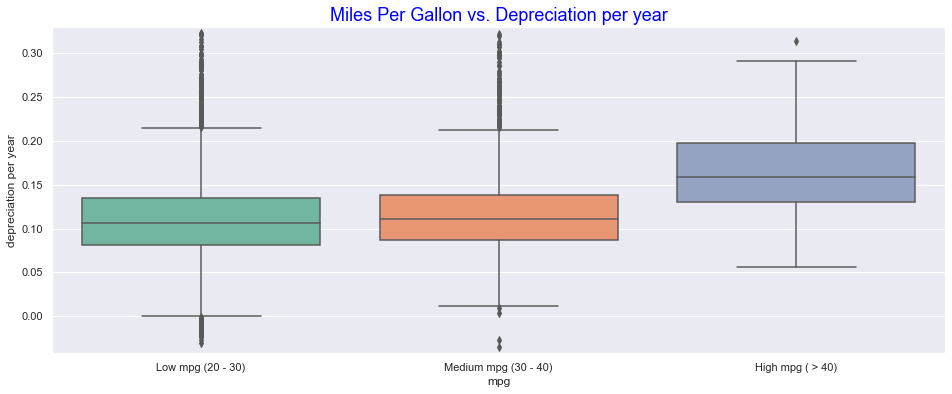

In [91]:
# The association of transmission and car prices
plt.figure(figsize=(16,6))
ax = sns.boxplot(x='mpg', y='depreciation per year', data=df2, orient="v", palette="Set2")
plt.title('Miles Per Gallon vs. Depreciation per year', color='blue', size = 18)
plt.margins(0.02)

The association between miles per gallon and depreciation has no regular pattern as the rate of miles per gallon changes. however, cars run over fifty per gallon relatively better in price retaining.


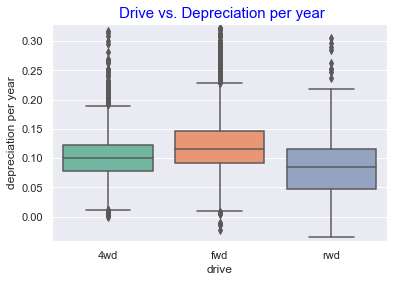

In [92]:
#The association of transmission and car price
plt.figure(figsize=(6,4))
ax = sns.boxplot(x='drive', y='depreciation per year', data=df2, orient="v", palette="Set2")
plt.title(' Drive vs. Depreciation per year', color='blue', size = 15)
plt.margins(0.02)

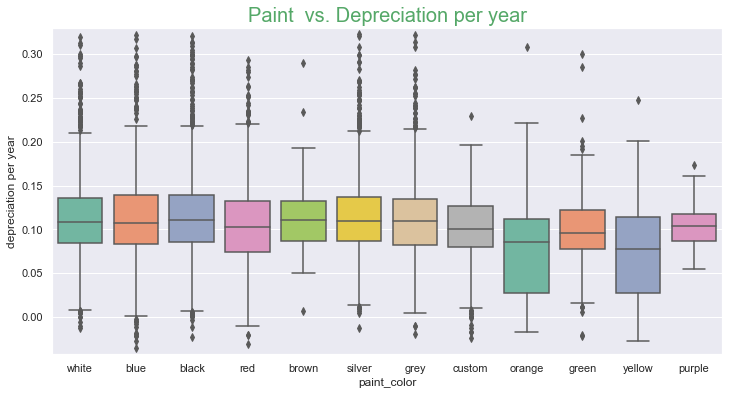

In [93]:
#Box plot distribution on "depreciation per yer" and "paint color" features 
plt.figure(figsize=(12,6))
ax = sns.boxplot(x='paint_color', y='depreciation per year', data=df2, orient="v", palette="Set2")
plt.title('Paint  vs. Depreciation per year', color='g', size = 20)
plt.margins(0.02)

Except for the orange car's paint color, the remaining colors have no association with the depreciation.


In [94]:
df2['cylinders'].unique()

array(['6 cylinders', '4 cylinders', '8 cylinders', '5 cylinders',
       '3 cylinders', 'other', '10 cylinders'], dtype=object)

In [95]:
mapping = {"10 cylinders": 10, "3 cylinders":3, "4 cylinders":4, "5 cylinders":5, "6 cylinders":6, "8 cylinders":
          8, "other": 1}
df2['cylinders'] = df2['cylinders'].map(mapping)

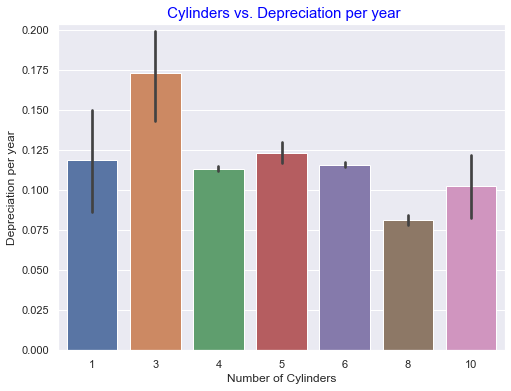

In [96]:
# Cylinders versus depreciation per year
plt.figure(figsize=(8,6))
sns.barplot(x= df2['cylinders'].sort_values().dropna(), y='depreciation per year', data=df2 )
plt.title(' Cylinders vs. Depreciation per year',color='blue', size = 15)
plt.xlabel('Number of Cylinders')
plt.ylabel('Depreciation per year')
plt.margins(0.02)


In [97]:
# The percentage of cylinders in the dataset
df2["cylinders"].value_counts(normalize = True)*100


4     52.203526
6     35.857372
8      9.481838
5      1.789530
3      0.320513
10     0.173611
1      0.173611
Name: cylinders, dtype: float64

The sum of the proportion of the cylinders (3,1,10) is less than one percent that leads to data imbalance. Such a big difference in data proportion among cylinders yields statistical bias. Generally, cars with cylinder 8  retain the price of any others.


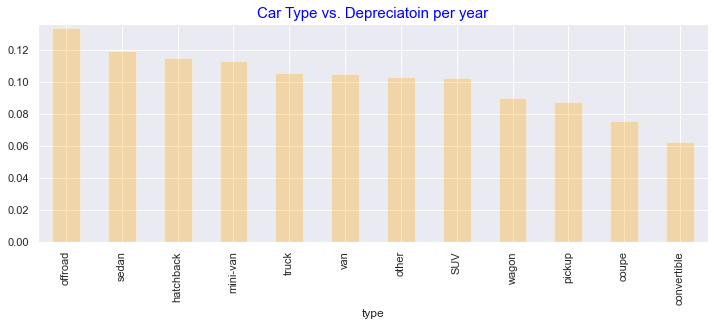

In [98]:
# The deprecaition per year distribution against the type of vehicles.
plt.figure(figsize=(12,4))
df2.groupby('type')['depreciation per year'].median().sort_values(ascending=False).plot(kind='bar', color='orange', alpha=0.3)
plt.title('Car Type vs. Depreciatoin per year',color='blue', size = 15)
plt.margins(0.02)

In [99]:
# The proportion of vehicles type
df2.type.value_counts(normalize=True)*100

sedan          39.610043
SUV            39.503205
coupe           6.810897
hatchback       5.582265
wagon           2.377137
mini-van        2.110043
convertible     1.762821
van             1.068376
other           0.547543
truck           0.440705
pickup          0.160256
offroad         0.026709
Name: type, dtype: float64

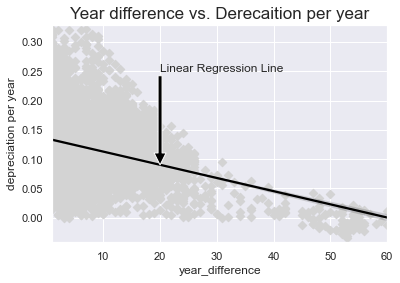

In [100]:
#The distribution bewtween year_difference and depreciation per year
plt.scatter(x= df2['year_difference'], y= df2['depreciation per year'], marker='D', color='lightgray' )
sns.regplot(x='year_difference', y='depreciation per year', data=df2, scatter=None, color='black', label='first order')
plt.xlabel('year_difference')
plt.ylabel('depreciation per year')
plt.annotate("Linear Regression Line", xy=(20, 0.09), xytext=(20, 0.25), arrowprops=dict(facecolor='black'))
plt.title('Year difference vs. Derecaition per year', size=17)
plt.margins(0.02)
plt.show()

At the early stage of year_difference  deprecaition per year is sharply dropped.

In [101]:
df2.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,...,type,paint_color,price_kbb,mpg,rating,year_kbb,year_difference,new_price,depreciation,depreciation per year
0,8995.0,2011,chevrolet,traverse,good,6,gas,178054.0,clean,automatic,...,SUV,white,30995.0,Low mpg (20 - 30),4.3,2021,10,25426.696,0.646238,0.098696
1,10995.0,2014,ford,explorer,good,6,gas,170259.0,clean,automatic,...,SUV,white,33470.0,Low mpg (20 - 30),4.1,2021,7,29137.649,0.622653,0.129970
2,12984.0,2016,nissan,rogue,excellent,4,gas,86942.0,clean,automatic,...,SUV,blue,26745.0,Low mpg (20 - 30),4.7,2021,5,24223.771,0.463998,0.117259
3,17382.0,2015,nissan,pathfinder,excellent,6,gas,48932.0,rebuilt,automatic,...,SUV,black,33075.0,Low mpg (20 - 30),4.1,2020,5,29957.047,0.419769,0.103149
4,25730.0,2017,ford,explorer,excellent,6,gas,49858.0,rebuilt,automatic,...,SUV,black,33470.0,Low mpg (20 - 30),4.1,2021,4,30921.106,0.167882,0.044906


In [102]:
df2.shape

(7488, 22)

In [103]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7488 entries, 0 to 8729
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   price                  7488 non-null   float64 
 1   year                   7488 non-null   int64   
 2   manufacturer           7488 non-null   object  
 3   model                  7488 non-null   object  
 4   condition              7488 non-null   object  
 5   cylinders              7488 non-null   int64   
 6   fuel                   7488 non-null   object  
 7   odometer               7488 non-null   float64 
 8   title_status           7488 non-null   object  
 9   transmission           7488 non-null   object  
 10  drive                  7488 non-null   object  
 11  size                   7488 non-null   object  
 12  type                   7488 non-null   object  
 13  paint_color            7488 non-null   object  
 14  price_kbb              7488 non-null   f

In [104]:
df3 = df2.dropna().copy()

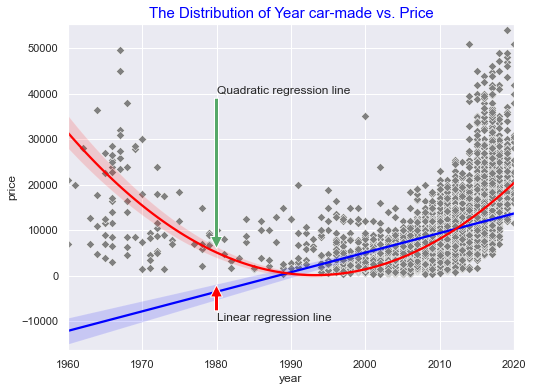

In [111]:
# Used car price distribution over a 60 years period.
plt.figure(figsize=(8,6))
ax = sns.scatterplot(x='year', y='price', data=df2,  palette="Set2", color='gray', marker='D' )
sns.regplot(x='year',y='price', data=df2, scatter=None, color='blue', label='First Order')
sns.regplot(x= 'year', y='price', data=df2, scatter=None, color='red', label='Frist order', order=2)
plt.title('The Distribution of Year car-made vs. Price',color='blue', size = 15)
plt.annotate("Linear regression line", xy=(1980, -2000), xytext=(1980, -10000),arrowprops=dict(facecolor='red'))
plt.annotate('Quadratic regression line', xy=(1980,6000), xytext=(1980, 40000),arrowprops=dict(facecolor='g'))
#plt.yscale('log')
plt.margins(0.02)
plt.show()

New cars depreciate faster, but cars made years1990 and before shows price starts to increases because those cars made before the specified period is considered as antique cars which highly demand versus sensibly less in supply. 



In [106]:
df2.columns


Index(['price', 'year', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'size',
       'type', 'paint_color', 'price_kbb', 'mpg', 'rating', 'year_kbb',
       'year_difference', 'new_price', 'depreciation',
       'depreciation per year'],
      dtype='object')

Evaluate features association and degree of strength with the target << adjusted new price>>

### Heatmap Correlation Matrix

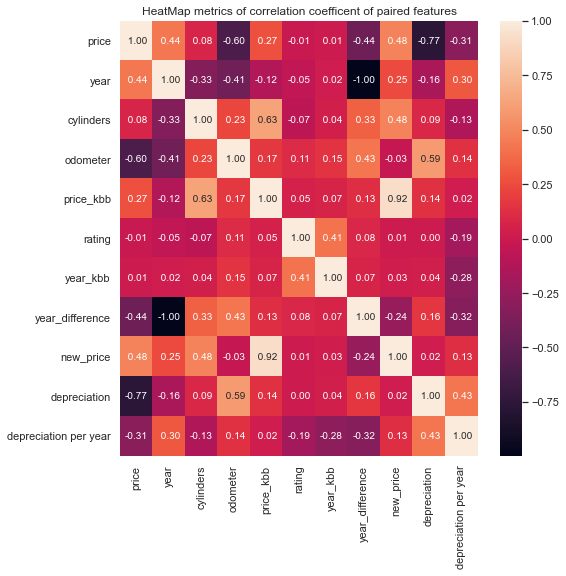

In [107]:
# Created a heatmap for numeric features.
plt.figure(figsize=(8,8))
sns.heatmap(df2.corr(), annot=True, fmt=' .2f', annot_kws={'size':10})
plt.title('HeatMap metrics of correlation coefficent of paired features')
plt.show()

In [108]:
datapath =  "../data"
if not os.path.exists(datapath):
    os.makdir(datapath)

In [109]:
# save file
"""cleaned_vehicles_data1 = os.path.join(datapath, "cleaned_vehicles_data_eda.csv")
if not os.path.exists(cleaned_vehicles_data1):
    df2.to_csv(cleaned_vehicles_data1, index=False)"""

'cleaned_vehicles_data1 = os.path.join(datapath, "cleaned_vehicles_data_eda.csv")\nif not os.path.exists(cleaned_vehicles_data1):\n    df2.to_csv(cleaned_vehicles_data1, index=False)'

In [110]:
# Second method save file
df2.to_csv('cleaned_vehicles data_eda.csv', index=False)